<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Car Accidente Severity</font></h1>

In this notebook we try to practice all the classification algorithms to classify the collision which caused physical damages


In [1]:
!pip install scipy
!pip install sklearn

In [2]:
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about reported collisions in the city of Seattle. The __Data-Collisions.csv__ data set includes details of 194.673 collisions and theirs severities. It includes following fields:


| FIELD         | DESCRIPTION                                                                                                                      |
|---------------|----------------------------------------------------------------------------------------------------------------------------------|
| SEVERITYCODE  | A code that corresponds to the severity of the collision (3-fatality;  2b-serious injury; 2-injury;  1-prop damage;  0-unknown)  |
| X             | Longitude                                                                                                                        |
| Y             | Latitude                                                                                                                         |
| OBJECTID      | ESRI unique identifier                                                                                                           |
| INCKEY        | ESRI geometry field                                                                                                              |
| COLDETKEY     | Secondary key for the incident                                                                                                   |
| REPORTNO      | No metadata available                                                                                                            |
| STATUS        | No metadata available                                                                                                            |
| ADDRTYPE      | Collision address type (Alley; Block; Intersection)                                                                              |
| INTKEY        | Key that corresponds to the intersection associated with a collision                                                             |
| LOCATION      | No metadata available                                                                                                            |
| EXCEPTRSNCODE | No metadata available                                                                                                            |
| EXCEPTRSNDESC | No metadata available                                                                                                            |
| SEVERITYCODE  | A code that corresponds to the severity of the collision (3-fatality;  2b-serious injury; 2-injury;  1-prop damage;  0-unknown   |
| SEVERITYDESC  | A detailed description of the severity of the collision                                                                          |
| COLLISIONTYPE | Collision type                                                                                                                   |
| PERSONCOUNT   | The total number of people involved in the collision                                                                             |
| PEDCOUNT      | The number of pedestrians involved in the collision                                                                              |
| PEDCYLCOUNT   | The number of bicycles involved in the collision                                                                                 |
| VEHCOUNT      | The number of vehicles involved in the collision                                                                                 |
| INCDATE       | The date of the incident                                                                                                         |
| INCDTTM       | The date and time of the incident                                                                                                |
| JUNCTIONTYPE  | Category of junction at which collision took place                                                                               |
| SDOT_COLCODE  | A code given to the collision by SDOT                                                                                            |
| SDOT_COLDESC  | A description of the collision corresponding to the collision code                                                               |
| INATTENTIONIND| Whether or not collision was due to inattention (Y/N)                                                                            |
| UNDERINFL     | Whether or not a driver involved was under the influence of drugs or alcohol                                                     |
| WEATHER       | A description of the weather conditions during the time of the collision                                                         |
| ROADCOND      | The condition of the road during the collision                                                                                   |
| LIGHTCOND     | The light conditions during the collision                                                                                        |
| PEDROWNOTGRNT | Whether or not the pedestrian right of way was not granted (Y/N)                                                                 |
| SDOTCOLNUM    | A number given to the collision by SDOT                                                                                          |
| SPEEDING      | Whether or not speeding was a factor in the collision (Y/N)                                                                      |
| ST_COLCODE    | A code provided by the state that describes the collision                                                                        |
| ST_COLDESC    | A description that corresponds to the state’s coding designation                                                                 |
| SEGLANEKEY    | A key for the lane segment in which the collision occurred                                                                       |
| CROSSWALKKEY  | A key for the crosswalk at which the collision occurred                                                                          |
| HITPARKEDCAR  | Whether or not the collision involved hitting a parked car (Y/N)                                                                 |



Lets download the dataset

### Load Data From CSV File  

In [4]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-23 15:12:15--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  40.3MB/s   in 1.7s   

2020-09-23 15:12:17 (40.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [5]:

df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.shape

(194673, 38)

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Convert to date time object 

In [8]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
df['INCYEAR'] = pd.DatetimeIndex(df['INCDATE']).year
df['INCMONTH'] = pd.DatetimeIndex(df['INCDATE']).month

In [10]:
#Verifying the missing data on my df
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [11]:
#FLOAT COLUMNS
#If the there null values on column, I replace it with the avarage

for column in df:
    col_null = df[column].isnull().values.any()
    
    if ((col_null == True) and (df[column].dtype == "float64")):
        avg = df[column].astype("float64").mean(axis=0)
        df[column].replace(np.nan, avg, inplace=True)
        print(avg)


-122.33051843904114
47.619542517688615
37558.45057630244
7972521.3371441495


In [12]:
#INT COLUMNS
#If the there null values on column, I replace it with the avarage

for column in df:
    col_null = df[column].isnull().values.any()
    
    if ((col_null == True) and (df[column].dtype == "int")):
        avg = df[column].astype("int64").mean(axis=0)
        df[column].replace(np.nan, avg, inplace=True)
        print(avg)

In [13]:
#CATEGORICAL VARIABLE


df['SPEEDING'] = df['SPEEDING'].fillna('N')
df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna('N')
df['UNDERINFL'] = df['UNDERINFL'].fillna('N')
df['ADDRTYPE'] = df['ADDRTYPE'].fillna('N')


#If there is any null, use the forward fill in order to propagate non-null values forward
df['ROADCOND'] = df['ROADCOND'].fillna(method='ffill')
df['LIGHTCOND'] = df['LIGHTCOND'].fillna(method='ffill')
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(method='ffill')
df['WEATHER'] = df['WEATHER'].fillna(method='ffill')



# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [17]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

136.485 with property damage and 58.188 collision invled injuries.

Lets plot some columns to underestand data better:

In [15]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [18]:
import seaborn as sns

### Understanding quantity of collision and their severities

Text(0.5, 1.0, 'Collisions per Year and Severity')

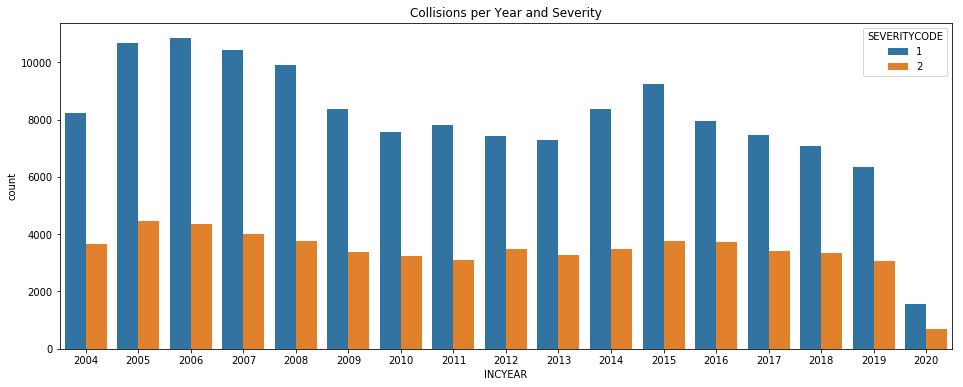

In [94]:
plt.figure(figsize=(16, 6))
sns.countplot(x="INCYEAR", hue="SEVERITYCODE", data=df).set_title("Collisions per Year and Severity")

Text(0.5, 1.0, 'Collisions per Month of Year and Severity')

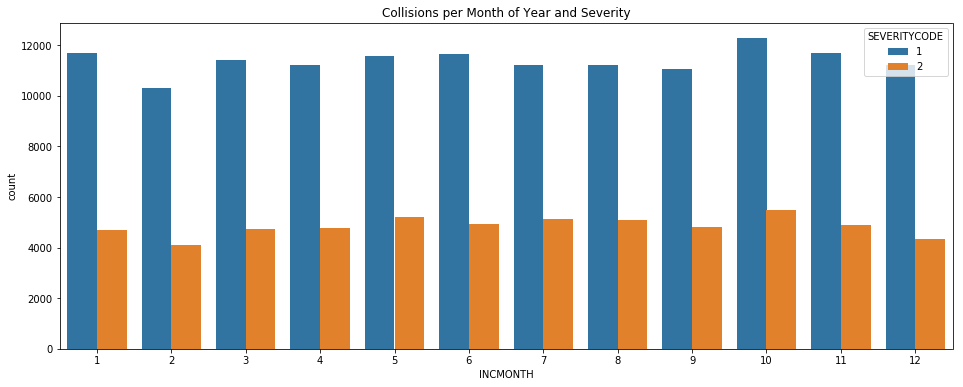

In [95]:
plt.figure(figsize=(16, 6))
sns.countplot(x="INCMONTH", hue="SEVERITYCODE", data=df).set_title("Collisions per Month of Year and Severity")

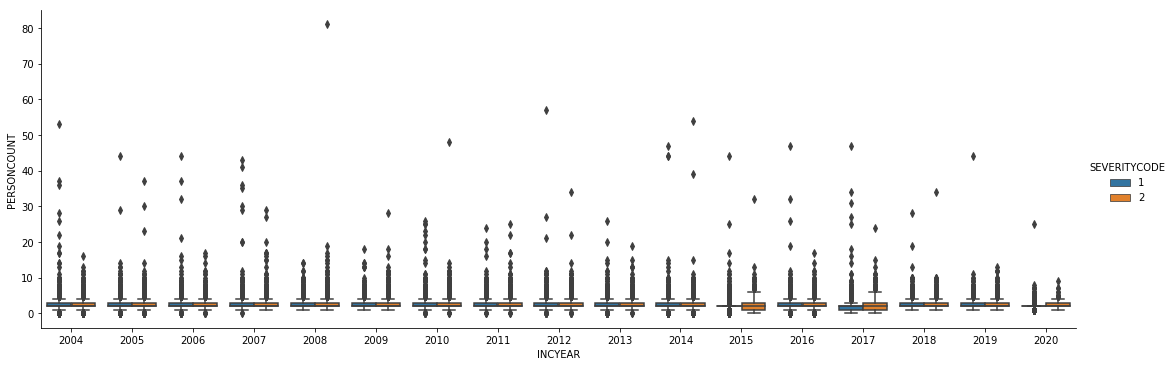

In [21]:
sns.catplot(data=df, kind="box", x="INCYEAR", y="PERSONCOUNT", hue="SEVERITYCODE", height=5, aspect=3).set_title("")

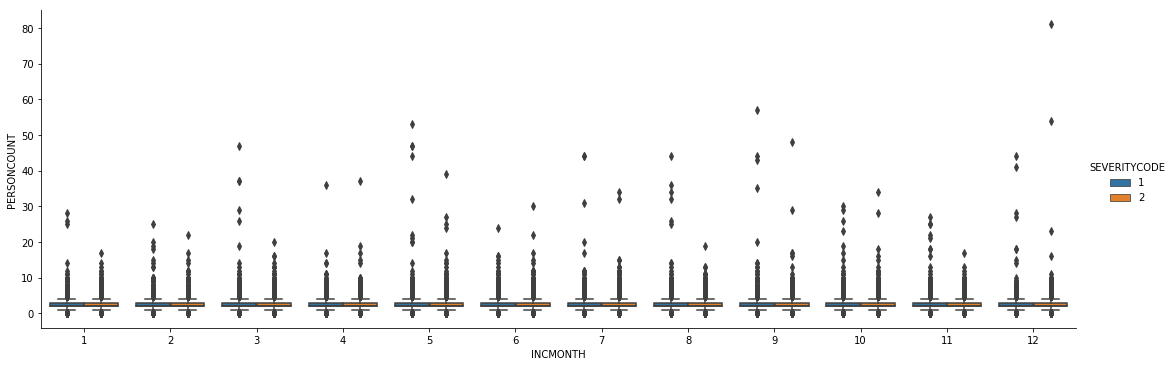

In [22]:
sns.catplot(data=df, kind="box", x="INCMONTH", y="PERSONCOUNT", hue="SEVERITYCODE", height=5, aspect=3)

### Using ANOVA to understand weather the YEAR and MONTH play a role or not

### Understanding the conditions

In [23]:
df['ROADCOND'].value_counts()

Dry               127947
Wet                48727
Unknown            15350
Ice                 1231
Snow/Slush          1023
Other                134
Standing Water       120
Sand/Mud/Dirt         76
Oil                   65
Name: ROADCOND, dtype: int64

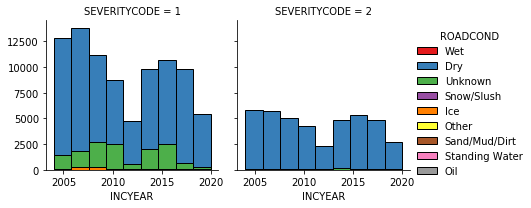

<Figure size 2160x1080 with 0 Axes>

In [24]:
bins = np.linspace(df.INCYEAR.min(), df.INCYEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ROADCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'INCYEAR', bins=bins, ec="k")

g.add_legend()

plt.figure(figsize=(30, 15))
plt.show()

In [25]:
df['LIGHTCOND'].value_counts()

Daylight                    119456
Dark - Street Lights On      49784
Unknown                      13731
Dusk                          6048
Dawn                          2579
Dark - No Street Lights       1586
Dark - Street Lights Off      1229
Other                          248
Dark - Unknown Lighting         12
Name: LIGHTCOND, dtype: int64

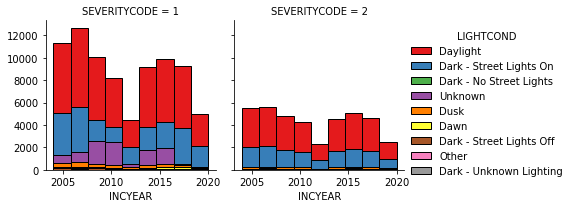

<Figure size 2160x1080 with 0 Axes>

In [26]:
bins = np.linspace(df.INCYEAR.min(), df.INCYEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'INCYEAR', bins=bins, ec="k")

g.add_legend()

plt.figure(figsize=(30, 15))
plt.show()

In [27]:
df['WEATHER'].value_counts()

Clear                       114271
Raining                      33973
Overcast                     28506
Unknown                      15357
Snowing                        927
Other                          849
Fog/Smog/Smoke                 585
Sleet/Hail/Freezing Rain       114
Blowing Sand/Dirt               58
Severe Crosswind                27
Partly Cloudy                    6
Name: WEATHER, dtype: int64

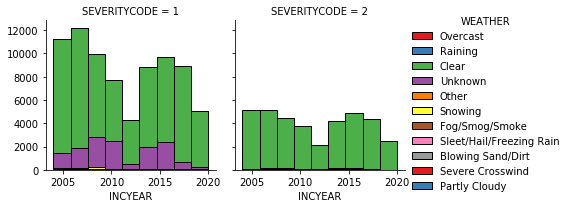

<Figure size 2160x1080 with 0 Axes>

In [28]:
bins = np.linspace(df.INCYEAR.min(), df.INCYEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'INCYEAR', bins=bins, ec="k")

g.add_legend()

plt.figure(figsize=(30, 15))
plt.show()

In [29]:
df['COLLISIONTYPE'].value_counts()

Parked Car    48984
Angles        35662
Rear Ended    35051
Other         24255
Sideswipe     19121
Left Turn     14097
Pedestrian     6789
Cycles         5610
Right Turn     3027
Head On        2077
Name: COLLISIONTYPE, dtype: int64

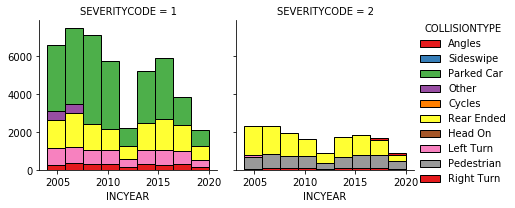

<Figure size 2160x1080 with 0 Axes>

In [31]:
bins = np.linspace(df.INCYEAR.min(), df.INCYEAR.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="COLLISIONTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'INCYEAR', bins=bins, ec="k")

g.add_legend()

plt.figure(figsize=(30, 15))
plt.show()

In [122]:
df_COLLISIONTYPE = df[['COLLISIONTYPE', 'SEVERITYCODE', 'OBJECTID']]
df_COLLISIONTYPE = df_COLLISIONTYPE.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().reset_index(name="Count")

df_WEATHER = df[['WEATHER', 'SEVERITYCODE', 'OBJECTID']]
df_WEATHER = df_WEATHER.groupby(['WEATHER', 'SEVERITYCODE']).size().reset_index(name="Count")

df_ROADCOND = df[['ROADCOND', 'SEVERITYCODE', 'OBJECTID']]
df_ROADCOND = df_ROADCOND.groupby(['ROADCOND', 'SEVERITYCODE']).size().reset_index(name="Count")

df_LIGHTCOND = df[['LIGHTCOND', 'SEVERITYCODE', 'OBJECTID']]
df_LIGHTCOND = df_LIGHTCOND.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().reset_index(name="Count")

Text(0.5, 1.0, 'Blox Plot: Number of Collision per Type')

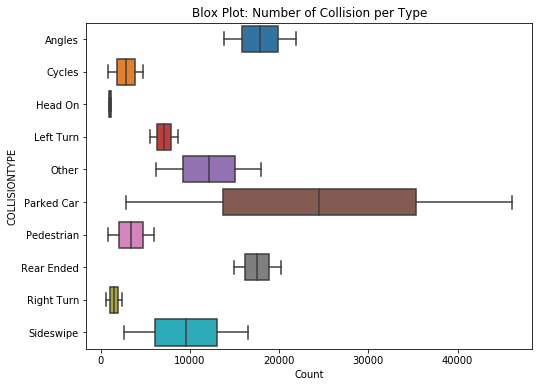

In [123]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Count", y="COLLISIONTYPE", data=df_COLLISIONTYPE).set_title("Blox Plot: Number of Collision per Type")

Text(0.5, 1.0, 'Blox Plot: Number of Collision per Weather Condition')

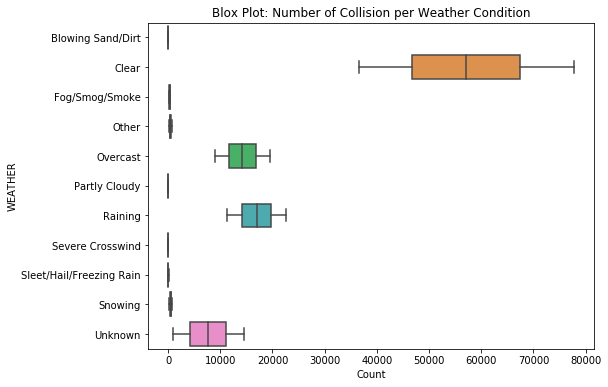

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Count", y="WEATHER", data=df_WEATHER).set_title("Blox Plot: Number of Collision per Weather Condition")

Text(0.5, 1.0, 'Blox Plot: Number of Collision per Road Condition')

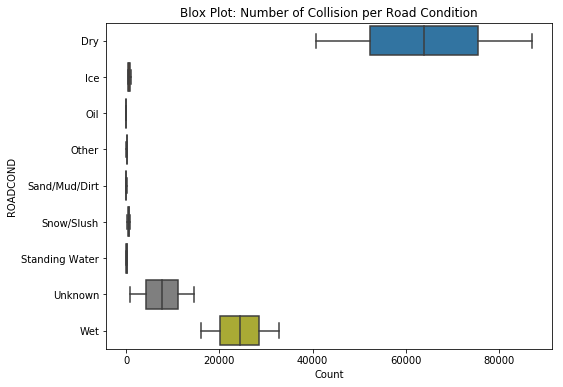

In [125]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Count", y="ROADCOND", data=df_ROADCOND).set_title("Blox Plot: Number of Collision per Road Condition")

Text(0.5, 1.0, 'Blox Plot: Number of Collision per Light Condition')

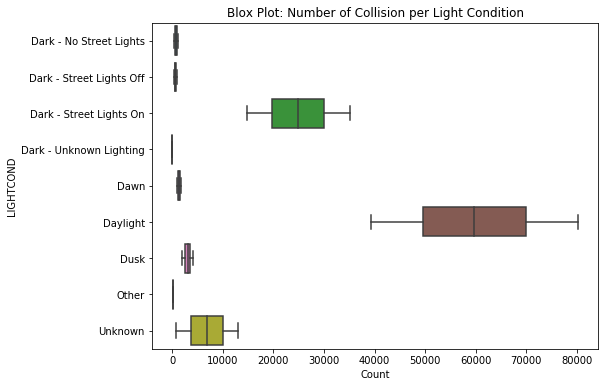

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Count", y="LIGHTCOND", data=df_LIGHTCOND).set_title("Blox Plot: Number of Collision per Light Condition")

## Convert Categorical features to numerical values

### Binning variables

In [32]:

df['ROADCOND_bins']=df['ROADCOND']
df['LIGHTCOND_bins'] = df['LIGHTCOND']
df['COLLISIONTYPE_bins'] = df['COLLISIONTYPE']
df['WEATHER_bins'] = df['WEATHER']
df['SPEEDING_bins']=df['SPEEDING']
df['HITPARKEDCAR_bins'] = df['HITPARKEDCAR']
df['STATUS_bins'] = df['STATUS']
df['ADDRTYPE_bins'] = df['ADDRTYPE']
df['UNDERINFL_bins'] = df['UNDERINFL']
df['INATTENTIONIND_bins'] = df['INATTENTIONIND']

In [35]:
df['LIGHTCOND_bins'].replace(to_replace=['Daylight',
                                         'Unknown',
                                         'Other',
                                         'Dusk',
                                         'Dawn',
                                         'Dark - Street Lights On',
                                         'Dark - No Street Lights',
                                         'Dark - Street Lights Off',
                                         'Dark - Unknown Lighting'], 
                            value=[0,0,0, 1,1,1, 2,2,2],inplace=True)

df.LIGHTCOND_bins.unique()

array([0, 1, 2])

In [36]:
df['COLLISIONTYPE_bins'].replace(to_replace=[
                                            'Parked Car',
                                            'Angles',
                                            'Rear Ended',
                                            'Head On',
                                            'Sideswipe',
                                            'Left Turn',
                                            'Right Turn',
                                            'Pedestrian',
                                            'Cycles',                                            
                                            'Other'                                            
                                            ], 
                            value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

df.COLLISIONTYPE_bins.unique()

array([1, 4, 0, 9, 8, 2, 3, 5, 7, 6])

In [37]:
df['WEATHER_bins'].replace(to_replace=[
                                        'Clear',
                                        'Unknown',
                                        'Other',

                                        'Overcast',
                                        'Fog/Smog/Smoke',
                                        'Partly Cloudy',

                                        'Raining',

                                        'Snowing',
                                        'Sleet/Hail/Freezing Rain',

                                        'Blowing Sand/Dirt',
                                        'Severe Crosswind'
                                            ], 
                            value=[0,0,0, 1,1,1, 2, 3,3, 4,4],inplace=True)

df.WEATHER_bins.unique()

array([1, 2, 0, 3, 4])

In [38]:
df['SPEEDING_bins'].replace(to_replace=['N', 'Y'], value=[0,1],inplace=True)

df.SPEEDING_bins.unique()

array([0, 1])

In [39]:
df['HITPARKEDCAR_bins'].replace(to_replace=['N', 'Y'], value=[0,1],inplace=True)

df.HITPARKEDCAR_bins.unique()

array([0, 1])

In [40]:
df['UNDERINFL_bins'].replace(to_replace=['N','0', 'Y', '1'], value=[0,0,1,1],inplace=True)

df.UNDERINFL_bins.unique()

array([0, 1])

In [41]:
df['INATTENTIONIND_bins'].replace(to_replace=['N', 'Y'], value=[0,1],inplace=True)
df.INATTENTIONIND_bins.unique()

array([0, 1])

In [42]:
df['ADDRTYPE_bins'].replace(to_replace=['N', 'Alley', 'Block', 'Intersection'], value=[0,1,2,3],inplace=True)

df.ADDRTYPE_bins.unique()

array([3, 2, 1, 0])

In [43]:
# Changing and binnig the sever
df['SEVERITYCODE_bins'] = df['SEVERITYCODE']
df['SEVERITYCODE_bins'].replace(to_replace=[1, 2], value=[0,1],inplace=True)

df.SEVERITYCODE_bins.unique()

array([1, 0])

### Feature selection

In [101]:
#Lets defind feature sets, X:
Features = df[[
                'X',
                'Y',
                'ROADCOND_bins',
                'LIGHTCOND_bins',
                'COLLISIONTYPE_bins',
                'WEATHER_bins',
                'SPEEDING_bins',
                'HITPARKEDCAR_bins',
                'ADDRTYPE_bins',
                'UNDERINFL_bins',
                'INATTENTIONIND_bins'    
                ]]

In [45]:
X = Features
X[0:5]

,X,Y,ROADCOND_bins,LIGHTCOND_bins,COLLISIONTYPE_bins,WEATHER_bins,SPEEDING_bins,HITPARKEDCAR_bins,ADDRTYPE_bins,UNDERINFL_bins,INATTENTIONIND_bins
0,-122.323148,47.703140,1,0,1,1,0,0,3,0,0
1,-122.347294,47.647172,1,1,4,2,0,0,2,0,0
2,-122.334540,47.607871,0,0,0,1,0,0,2,0,0
3,-122.334803,47.604803,0,0,9,0,0,0,2,0,0
4,-122.306426,47.545739,1,0,1,2,0,0,3,0,0


In [46]:
y = df['SEVERITYCODE_bins'].values
y[0:5]

array([1, 0, 0, 0, 1])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [47]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.24930404,  1.50948129,  1.16981641, -0.65839998, -0.65631161,
         0.60650629, -0.22440165, -0.19619929,  1.30002869, -0.2217116 ,
        -0.42518348],
       [-0.56747188,  0.49889979,  1.16981641,  1.34226652,  0.31862792,
         1.8603468 , -0.22440165, -0.19619929, -0.58573264, -0.2217116 ,
        -0.42518348],
       [-0.1360361 , -0.21073866, -0.50152283, -0.65839998, -0.98129145,
         0.60650629, -0.22440165, -0.19619929, -0.58573264, -0.2217116 ,
        -0.42518348],
       [-0.14494267, -0.26614566, -0.50152283, -0.65839998,  1.94352713,
        -0.64733422, -0.22440165, -0.19619929, -0.58573264, -0.2217116 ,
        -0.42518348],
       [ 0.81495737, -1.33262277,  1.16981641, -0.65839998, -0.65631161,
         1.8603468 , -0.22440165, -0.19619929,  1.30002869, -0.2217116 ,
        -0.42518348]])

# Classification 

# K Nearest Neighbor (KNN)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 11) (155738,)
Test set: (38935, 11) (38935,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [51]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7955412295008283
Test set Accuracy:  0.726724027224862


In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67622961, 0.71966097, 0.70378837, 0.72672403, 0.71228971,
       0.72574804, 0.71693849, 0.72793117, 0.7194555 ])

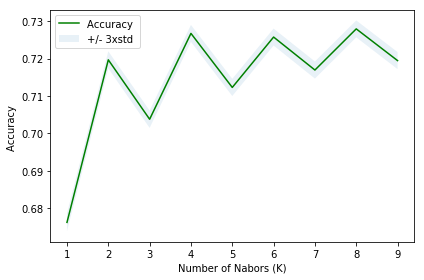

In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, yhat)

0.7194555027610119

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7034022035635701

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
collisionTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
collisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
predTree = collisionTree.predict(X_test)

In [59]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7443945036599461


In [60]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7194555027610119

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7034022035635701

# Support Vector Machine

In [62]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [63]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [93]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['0','1'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [73]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.724463850006421

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6549284989092918

# Logistic Regression

In [75]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [79]:
X = np.asarray(df[['X','Y','ROADCOND_bins', 'LIGHTCOND_bins','COLLISIONTYPE_bins','WEATHER_bins','SPEEDING_bins','HITPARKEDCAR_bins','ADDRTYPE_bins','UNDERINFL_bins','INATTENTIONIND_bins']])

X[0:5]

array([[-122.3231484 ,   47.70314032,    1.        ,    0.        ,
           1.        ,    1.        ,    0.        ,    0.        ,
           3.        ,    0.        ,    0.        ],
       [-122.3472943 ,   47.64717249,    1.        ,    1.        ,
           4.        ,    2.        ,    0.        ,    0.        ,
           2.        ,    0.        ,    0.        ],
       [-122.33454   ,   47.60787143,    0.        ,    0.        ,
           0.        ,    1.        ,    0.        ,    0.        ,
           2.        ,    0.        ,    0.        ],
       [-122.3348033 ,   47.60480289,    0.        ,    0.        ,
           9.        ,    0.        ,    0.        ,    0.        ,
           2.        ,    0.        ,    0.        ],
       [-122.3064263 ,   47.54573946,    1.        ,    0.        ,
           1.        ,    2.        ,    0.        ,    0.        ,
           3.        ,    0.        ,    0.        ]])

In [81]:
Y = df['SEVERITYCODE_bins']
Y = np.asarray(Y)
Y

array([1, 0, 0, ..., 1, 1, 0])

In [83]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 11) (155738,)
Test set: (38935, 11) (38935,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7467039 , 0.2532961 ],
       [0.55889638, 0.44110362],
       [0.95118488, 0.04881512],
       ...,
       [0.71789777, 0.28210223],
       [0.8145143 , 0.1854857 ],
       [0.70176392, 0.29823608]])

In [88]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7131886477462437

In [89]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['COLLECTION','PAIDOFF'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [90]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.95      0.82     27425
           1       0.56      0.14      0.22     11510

   micro avg       0.71      0.71      0.71     38935
   macro avg       0.64      0.55      0.52     38935
weighted avg       0.68      0.71      0.65     38935



In [92]:

from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.5693156404082131

# Model Evaluation using Test set

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.72    | 0.70     | NA      |
| Decision Tree      | 0.72    | 0.70     | NA      |
| SVM                | 0.72    | 0.65     | NA      |
| LogisticRegression | 0.71    | 0.65     | 0.56    |